In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# 6.1.1 simple KNN on payment_inc_ratio and dti

loan_data200 = pd.read_csv('../data/loan200.csv')
loan_data_1_1 = loan_data200.copy()
loan_data_1_1.head(6)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
5,paid off,1.89923,11.34


In [3]:
# 6.1.1 (cont')
from sklearn.neighbors import KNeighborsClassifier

# training on KNN from sklearn
#knn_1_1 = NearestNeighbors(n_neighbors=20, algorithm='ball_tree')
knn_1_1 = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')

# test <- first data
test = loan_data_1_1.iloc[0, 1:3]
test = np.array(test).reshape(1,2)

# x_train <- payment_inc_ratio and dti
# y_train <- outcome
x_train = loan_data_1_1.iloc[1:,1:3]
y_train = loan_data_1_1.iloc[1:,0]

# fitting with x and y
knn_1_1.fit(x_train, y_train)

# predicting test's class
result_1_1 = knn_1_1.predict(test)
result_1_1

array(['paid off'], dtype=object)

In [4]:
# 6.1.4 Standardization, Regularization and Z score

loan_data = pd.read_csv('../data/loan_data.csv')
features_1_4 = ['outcome','payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
loan_data_1_4 = loan_data[features_1_4]
loan_data_1_4.head(6)

,outcome,payment_inc_ratio,dti,revol_bal,revol_util
0,default,2.39320,1.00,1687,9.4
1,default,4.57170,5.55,5210,32.6
2,default,9.71600,18.08,9279,36.5
3,default,12.21520,10.08,10452,91.7
4,default,3.90888,7.06,11997,55.5
5,default,8.01977,13.22,32135,90.3


In [5]:
# 6.1.4 (cont') without scaling

# training on KNN from sklearn
knn_1_4 = KNeighborsClassifier(n_neighbors=5, radius=0.5, algorithm='ball_tree')

# test <- first data
test = loan_data_1_4.iloc[0,1:]
test = np.array(test).reshape(1,4)

print('test payment_inc_ratio: %f' %test[0,0])
print('test dti: %f' %test[0,1])
print('test revol_bal: %f' %test[0,2])
print('test revol_util: %f' %test[0,3])

# x_train <- payment_inc_ratio and dti
# y_train <- outcome
x_train = loan_data_1_4.iloc[1:,1:5]
y_train = loan_data_1_4.iloc[1:,0]

# fitting with X and y
knn_1_4.fit(X=x_train, y=y_train)

# querying nearest neighbors of 'test' and get the nearest neighbor's outcome
distance_1_4, result_1_4 = knn_1_4.kneighbors(test)
pred_1_4 = knn_1_4.predict(test)
print('predicted class: %s'%pred_1_4[0])
loan_data_1_4.iloc[result_1_4[0]]

test payment_inc_ratio: 2.393200
test dti: 1.000000
test revol_bal: 1687.000000
test revol_util: 9.400000
predicted class: paid off


,outcome,payment_inc_ratio,dti,revol_bal,revol_util
35535,paid off,8.30143,11.38,10074,69.5
33650,paid off,7.04082,21.81,25639,76.1
25862,paid off,4.14828,12.96,7302,88.0
42952,paid off,9.14223,1.23,7918,19.8
43598,paid off,2.50637,7.65,43305,48.7


In [6]:
# 6.1.4 (cont') with scaling

from sklearn import preprocessing

# scaling original data
loan_data_1_4_std = pd.DataFrame()
for cols in ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']:
    loan_data_1_4_std[cols] = preprocessing.scale(loan_data_1_4[cols])

# test <- first data
test = loan_data_1_4_std.iloc[0]
test = np.array(test).reshape(1,4)

knn_1_4_std = KNeighborsClassifier(n_neighbors=5, radius=0.5, algorithm='kd_tree')

print('test payment_inc_ratio: %f' %loan_data_1_4.iloc[0,1])
print('test dti: %f' %loan_data_1_4.iloc[0,2])
print('test revol_bal: %f' %loan_data_1_4.iloc[0,3])
print('test revol_util: %f' %loan_data_1_4.iloc[0,4])

# x_train <- payment_inc_ratio and dti
# y_train <- outcome
x_train_std = loan_data_1_4_std.iloc[1:]
y_train_std = loan_data_1_4.iloc[1:,0]

# fitting with X and y
knn_1_4_std.fit(X=x_train_std, y=y_train_std)

# querying nearest neighbors of 'test' and get the nearest neighbor's outcome
distance_1_4_std, result_1_4_std = knn_1_4_std.kneighbors(test)
pred_1_4_std = knn_1_4_std.predict(test)
print('predicted class: %s'%pred_1_4_std[0])
loan_data_1_4.iloc[result_1_4_std[0]]

test payment_inc_ratio: 2.393200
test dti: 1.000000
test revol_bal: 1687.000000
test revol_util: 9.400000
predicted class: paid off


,outcome,payment_inc_ratio,dti,revol_bal,revol_util
2079,default,10.04400,19.89,9179,51.5
1437,default,3.87890,5.31,1687,51.1
30214,paid off,6.71820,15.44,4295,26.0
28541,paid off,6.93816,20.31,11182,76.1
44736,paid off,8.20170,16.65,5244,73.9


In [7]:
# 6.1.6 Feature Engineering by KNN

borrow_1_6_features = ['outcome', 'dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']
borrow_1_6 = loan_data[borrow_1_6_features]
borrow_1_6.head()

,outcome,dti,revol_bal,revol_util,open_acc,delinq_2yrs_zero,pub_rec_zero
0,default,1.00,1687,9.4,3,1,1
1,default,5.55,5210,32.6,11,1,1
2,default,18.08,9279,36.5,2,1,1
3,default,10.08,10452,91.7,4,1,1
4,default,7.06,11997,55.5,14,1,1


In [8]:
# 6.1.6 (cont')

# test <- first data
test = borrow_1_6.iloc[0, 1:7]
test = np.array(test).reshape(1,6)

knn_1_6 = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')

print('test dti: %f' %test[0,0])
print('test revol_bal: %f' %test[0,1])
print('test revol_util: %f' %test[0,2])
print('test open_acc: %f' %test[0,3])
print('test delinq_2yrs_zero: %f' %test[0,4])
print('test pub_rec_zero: %f' %test[0,5])

# x_train <- 'dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero'
# y_train <- 'outcome'
x_train = borrow_1_6.iloc[1:,1:]
y_train = borrow_1_6.iloc[1:,0]

# fitting with X and y
knn_1_6.fit(X=x_train, y=y_train)

# querying nearest neighbors of 'test' and get the nearest neighbor's outcome
distance_1_6, result_1_6 = knn_1_6.kneighbors(test)
pred_1_6 = knn_1_6.predict(test)
print('predicted class: %s'%pred_1_6[0])
prob_1_6 = knn_1_6.predict_proba(test)
print('paid-off probability: %f'%prob_1_6[0,1])

test dti: 1.000000
test revol_bal: 1687.000000
test revol_util: 9.400000
test open_acc: 3.000000
test delinq_2yrs_zero: 1.000000
test pub_rec_zero: 1.000000
predicted class: paid off
paid-off probability: 0.700000


In [39]:
pred_all_1_6 = knn_1_6.predict_proba(borrow_1_6.iloc[:,1:7])
borrow_1_6['default_prob'] = pred_all_1_6[:,0]
borrow_1_6['prob'] = borrow_1_6['default_prob']

for idx in range(0, borrow_1_6.shape[0]):
    if borrow_1_6.iloc[idx, 0] != 'default':
        if idx % 1000 == 0:
            print('idx: %d'%idx)
        borrow_1_6.iloc[idx, 8] = 1 - borrow_1_6.iloc[idx, 7]
        
borrow_1_6.head()

# lambda takes forever
#borrow_1_6['prob'] = borrow_1_6.outcome.apply(lambda x: borrow_1_6.default_prob if x == 'default' else (1 - borrow_1_6.default_prob))

idx: 23000
idx: 24000
idx: 25000
idx: 26000
idx: 27000
idx: 28000
idx: 29000
idx: 30000
idx: 31000
idx: 32000
idx: 33000
idx: 34000
idx: 35000
idx: 36000
idx: 37000
idx: 38000
idx: 39000
idx: 40000
idx: 41000
idx: 42000
idx: 43000
idx: 44000
idx: 45000


,outcome,dti,revol_bal,revol_util,open_acc,delinq_2yrs_zero,pub_rec_zero,default_prob,prob
0,default,1.00,1687,9.4,3,1,1,0.3,0.3
1,default,5.55,5210,32.6,11,1,1,0.3,0.3
2,default,18.08,9279,36.5,2,1,1,0.5,0.5
3,default,10.08,10452,91.7,4,1,1,0.5,0.5
4,default,7.06,11997,55.5,14,1,1,0.6,0.6


In [41]:
# 6.1.6 (cont')
borrow_1_6.prob.describe()

count    45342.000000
mean         0.561707
std          0.161138
min          0.100000
25%          0.500000
50%          0.600000
75%          0.700000
max          1.000000
Name: prob, dtype: float64

In [3]:
# 6.2.1 Simple Example from loan3000.csv

loan_data3000 = pd.read_csv('../data/loan3000.csv')
features_2_1 = ['outcome', 'borrower_score', 'payment_inc_ratio']
loan_2_1 = loan_data3000[features_2_1]
loan_2_1.head()

,outcome,borrower_score,payment_inc_ratio
0,paid off,0.40,5.11135
1,default,0.40,5.43165
2,paid off,0.70,9.23003
3,paid off,0.40,2.33482
4,default,0.45,12.10320


In [22]:
# 6.2.1 (Cont') 

from sklearn import tree

test = loan_2_1.iloc[0, 1:]
test = np.array(test).reshape(1,2)

# Sklearn's Decision Tree doesn't support the direct pruning parameter such as R's cp in rpart.
clf = tree.DecisionTreeClassifier(max_depth=4)

# x_train <- 'borrower_score', 'payment_inc_ratio'
# y_train <- 'outcome'
x_train = loan_2_1[features_2_1[1:]]
y_train = loan_2_1[features_2_1[0]]

# fitting with X and y
clf.fit(X=x_train, y=y_train)
clf.predict(test)

array(['paid off'], dtype=object)

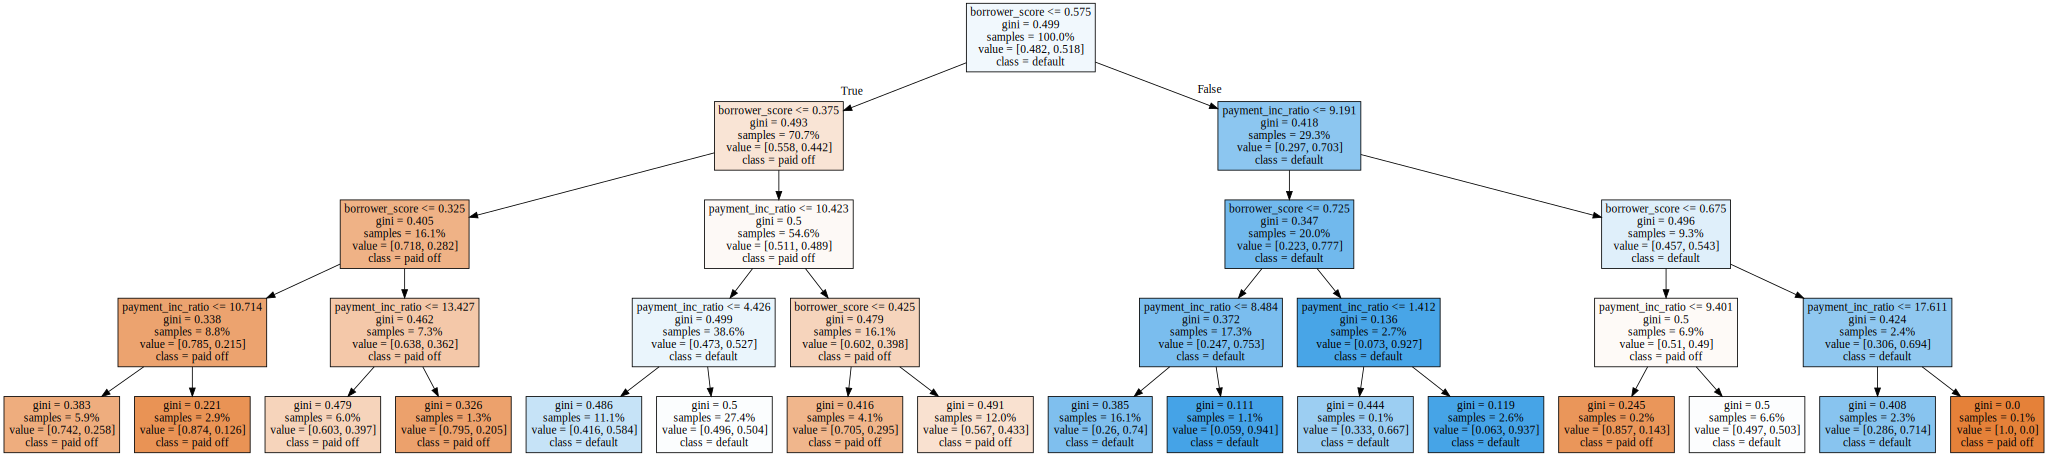

In [12]:
# 6.2.1 (Cont') Graphical visualization of simple Decision Tree
import gc
import graphviz

# Graphically visualizing tree.
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_2_1[1:], class_names=y_train.unique(), proportion=True, filled=True)  
graph = graphviz.Source(dot_data)
graph

In [25]:
# 6.2.1 (Cont') Text Tree structure of simple Decision Tree

n_nodes = clf.tree_.node_count
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to node %s."% 
              (node_depth[i] * "\t",i,children_left[i],feature[i],threshold[i],children_right[i],)
             )
print()


The binary tree structure has 31 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.5750000178813934 else to node 16.
	node=1 test node: go to node 2 if X[:, 0] <= 0.375 else to node 9.
		node=2 test node: go to node 3 if X[:, 0] <= 0.32500000298023224 else to node 6.
			node=3 test node: go to node 4 if X[:, 1] <= 10.714100360870361 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 test node: go to node 7 if X[:, 1] <= 13.426599979400635 else to node 8.
				node=7 leaf node.
				node=8 leaf node.
		node=9 test node: go to node 10 if X[:, 1] <= 10.42264986038208 else to node 13.
			node=10 test node: go to node 11 if X[:, 1] <= 4.4260101318359375 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 0] <= 0.42499999701976776 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 1] <= 9.19082498550415 else to node 24.
		node=

In [ ]:
# 6.3.3 Random Forest: Variable's Importance